## Expectation Reflection for Diabetes Diagnosis
In this work, we apply our method, Expectation Reflection (ER), to predict diabetes from Pima Indians Diabetes dataset. We compare the performance of ER with other existing methods such as Logistic Regression, Naive Bayes, Dicision Tree, Random Forest, k-nearest neighbors, and Support Vector Machines (SVM).

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import expectation_reflection as ER

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
# load data
s = pd.read_csv('../diabetes_data.csv',sep= ',', header= None)
s.head()

,0,1,2,3,4,5,6,7,8
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


The data contains 8 features:<br/>
1) Pregnancies: Number of times pregnant<br/>
2) Glucose: Plasma glucose concentration at 2 hours in an oral glucose tolerance test (GTT)<br/>
3) BloodPressure: Diastolic blood pressure (mmHg)<br/>
4) SkinThickness: Triceps skin fold thickness (mm)<br/>
5) Insulin: 2-Hour serum insulin (mu U/ml)<br/>
6) BMI: Body Mass Index (weight(kg)/(height(m))^2)<br/>
7) DiabetesPedigreeFunction: Diabetes Pedigree Function<br/>
8) Age: Age (years)<br/>

and 1 target: 1 (positive), 0 (negative)

### Impute missing data

In [4]:
# impute missing data
Xy = np.loadtxt('../diabetes_data_imputed_knn3.txt').astype(float)

# select features and target:
X = Xy[:,:8]
y = Xy[:,8]

# convert 1,0 to 1,-1:
y = 2*y - 1

### Shuffle data

In [5]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [6]:
# Normalize data
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X)

from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

### Prediction

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def ML_inference(X_train,y_train,X_test,y_test,method='expectation_reflection'):
    if method == 'expectation_reflection':
        h0,w = ER.fit(X_train,y_train,niter_max=20,regu=0.001)
        y_pred = ER.predict(X_test,h0,w)
        accuracy = accuracy_score(y_test,y_pred)
        
    else:
        if method == 'logistic_regression':
            model = LogisticRegression(solver='liblinear')

        if method == 'naive_bayes': 
            model = GaussianNB()

        if method == 'random_forest':
            model = RandomForestClassifier(criterion = "gini", random_state = 1,
                           max_depth=3, min_samples_leaf=5,n_estimators=100)        
        if method == 'decision_tree':
            model = DecisionTreeClassifier()  

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)        
        accuracy = accuracy_score(y_test,y_pred)
    return accuracy

In [8]:
list_methods=['expectation_reflection','naive_bayes','logistic_regression','decision_tree','random_forest']

In [9]:
def compare_ML_inference(X,y,train_size):
    npred = 500
    accuracy = np.zeros((len(list_methods),npred))
    for ipred in range(npred):
        X, y = shuffle(X, y)
        X_train0,X_test,y_train0,y_test = train_test_split(X,y,test_size=0.2,random_state = ipred)

        idx_train = np.random.choice(len(y_train0),size=int(train_size*len(y_train0)),replace=False)
        X_train,y_train = X_train0[idx_train],y_train0[idx_train]

        for i,method in enumerate(list_methods):
            accuracy[i,ipred] = ML_inference(X_train,y_train,X_test,y_test,method)
            #print('% 20s :'%method,accuracy)            
        #print(y_train.shape[0],y_test.shape[0])

    return accuracy.mean(axis=1),accuracy.std(axis=1)

In [10]:
list_train_size = [1.,0.8,0.6,0.4,0.2,0.1,0.05]

acc = np.zeros((len(list_train_size),len(list_methods)))
acc_std = np.zeros((len(list_train_size),len(list_methods)))
for i,train_size in enumerate(list_train_size):
    acc[i,:],acc_std[i,:] = compare_ML_inference(X,y,train_size)
    print(train_size,acc[i,:]) 

(1.0, array([0.76720779, 0.74719481, 0.76376623, 0.70197403, 0.75754545]))
(0.8, array([0.76436364, 0.74496104, 0.76262338, 0.69649351, 0.75532468]))
(0.6, array([0.76763636, 0.74850649, 0.76449351, 0.69641558, 0.75796104]))
(0.4, array([0.76105195, 0.7452987 , 0.75501299, 0.69255844, 0.75205195]))
(0.2, array([0.75633766, 0.74267532, 0.73201299, 0.68038961, 0.74253247]))
(0.1, array([0.743     , 0.73511688, 0.70328571, 0.67481818, 0.73222078]))
(0.05, array([0.71868831, 0.71281818, 0.67414286, 0.66174026, 0.70722078]))


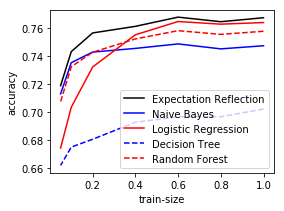

In [11]:
plt.figure(figsize=(4,3))
plt.plot(list_train_size,acc[:,0],'k-',label='Expectation Reflection')
plt.plot(list_train_size,acc[:,1],'b-',label='Naive Bayes')
plt.plot(list_train_size,acc[:,2],'r-',label='Logistic Regression')
plt.plot(list_train_size,acc[:,3],'b--',label='Decision Tree')
plt.plot(list_train_size,acc[:,4],'r--',label='Random Forest')
plt.xlabel('train-size')
plt.ylabel('accuracy')
plt.legend()